In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from pytorch_lightning.loggers import CSVLogger
from pytorch_lightning import Trainer
from qml_ssl.models.classical import Conv_Siamese, Conv_Classifier
from qml_ssl.utils import generate_embeddings, vmf_kde_on_circle, pca_proj, tsne_proj, plot_training

import matplotlib.pyplot as plt

from qml_ssl.data import create_data_loader, load_mnist_img

## MNIST Dataset

In [3]:
classes = (0, 1)
reduced_dim = 10
dataset_size = (4000, 1000)

mnist_data = load_mnist_img(classes=classes, reduced_dim = reduced_dim, dataset_size=dataset_size)

train_loader = create_data_loader(mnist_data["train_data"], mnist_data["train_labels"])
val_loader = create_data_loader(mnist_data["test_data"], mnist_data["test_labels"], shuffle=False)

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


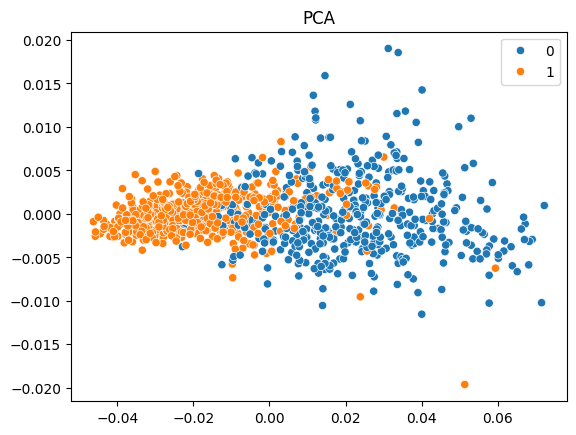

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:74: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="T-SNE")


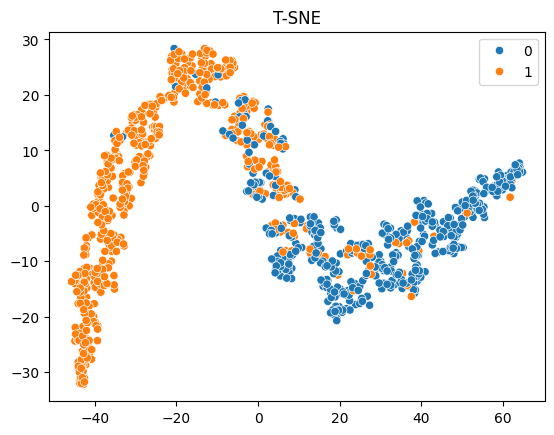

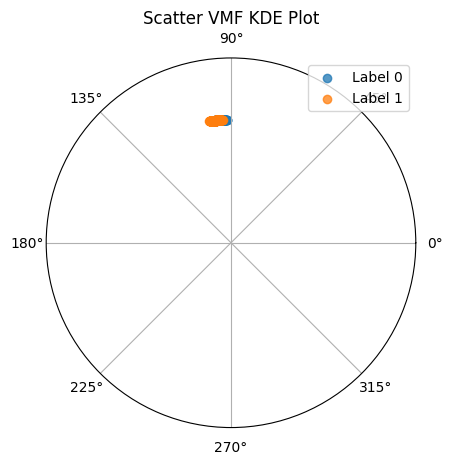

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params | Mode
-------------------------------------------------------
0 | encoder    | ConvEncoder      | 360    | eval
1 | head       | LinearHead       | 18     | eval
2 | classify   | Linear           | 6      | eval
3 | loss       | CrossEntropyLoss | 0      | eval
4 | train_loss | MeanMetric       | 0      | eval
5 | valid_loss | MeanMetric       | 0      | eval
-------------------------------------------------------
384       Train

Epoch 2: 100%|██████████| 63/63 [00:01<00:00, 43.35it/s, v_num=0, val_loss=0.327, train_loss=0.366]

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 63/63 [00:01<00:00, 42.80it/s, v_num=0, val_loss=0.327, train_loss=0.366]


/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


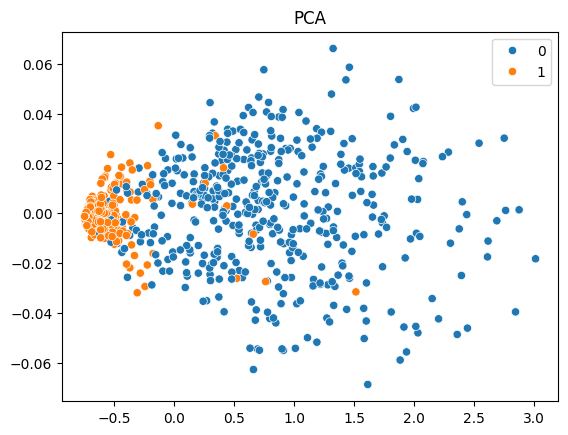

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:74: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="T-SNE")


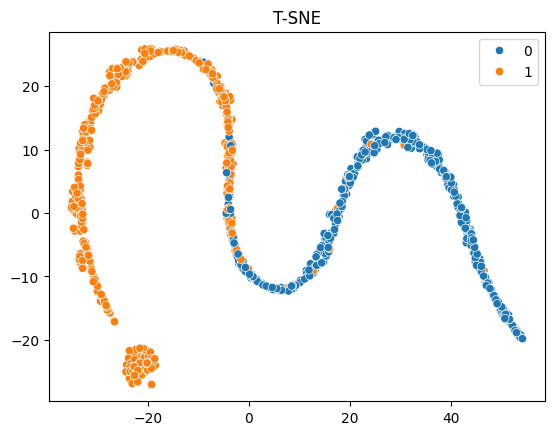

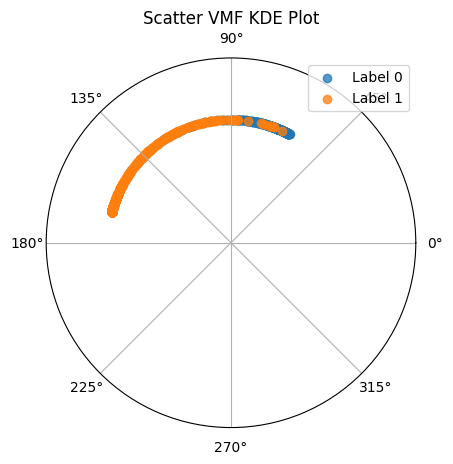

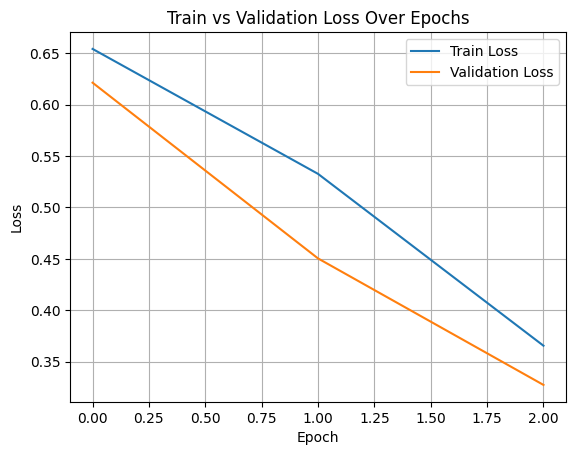

In [4]:
model = Conv_Classifier(activ_type="relu", pool_type="max", channel_nums=8, head_output=2, classes=classes, lr=1e-3)

# Plot embeddings before training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# Training the model
logger = CSVLogger(save_dir="logs/", name="MNIST_Classifier", version=0)
trainer = Trainer(max_epochs=20, logger=logger, devices=1 if torch.cuda.is_available() else 0)
trainer.fit(model, train_loader, val_loader)

# Plot embeddings after training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(logger.log_dir)

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


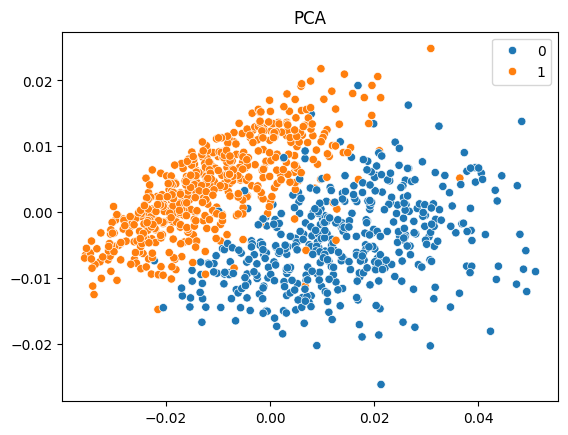

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:74: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="T-SNE")


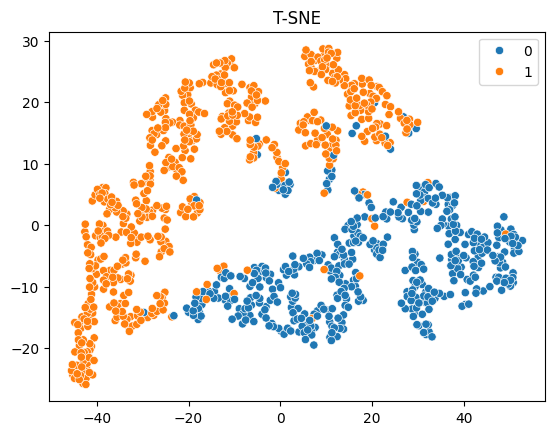

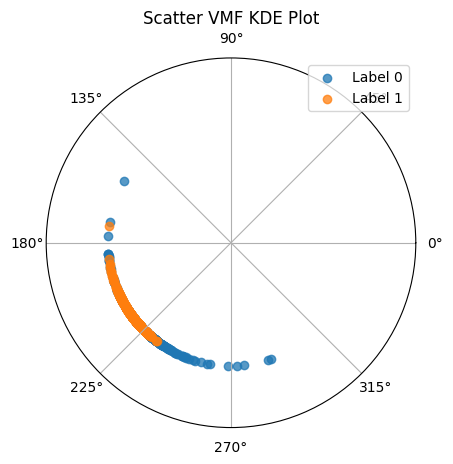

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type            | Params | Mode
------------------------------------------------------
0 | encoder    | ConvEncoder     | 360    | eval
1 | head       | LinearHead      | 18     | eval
2 | loss       | ContrastiveLoss | 0      | eval
3 | train_loss | MeanMetric      | 0      | eval
4 | valid_loss | MeanMetric      | 0      | eval
------------------------------------------------------
378       Trainable params
0         Non-trainable params
378       Total params
0.002     Total estimated model params size (MB)
0         Modules in train mode
23        Modules in eval mode


Epoch 49: 100%|██████████| 63/63 [00:01<00:00, 32.98it/s, v_num=0, val_loss=0.147, train_loss=0.306] 

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 49: 100%|██████████| 63/63 [00:01<00:00, 32.78it/s, v_num=0, val_loss=0.147, train_loss=0.306]


/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


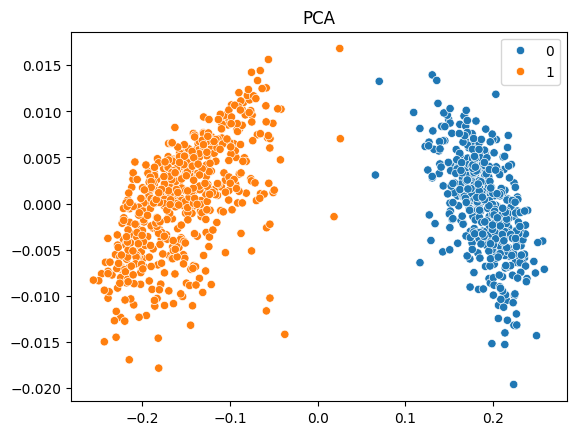

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:74: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="T-SNE")


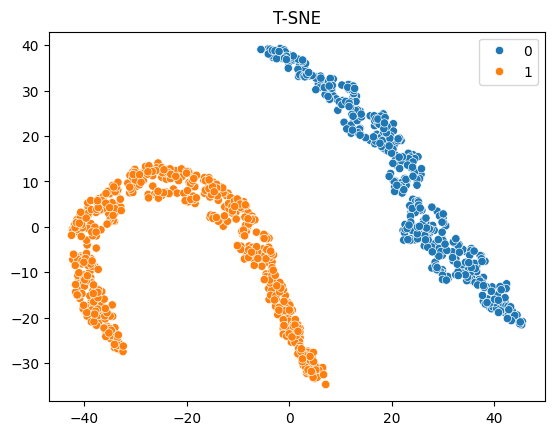

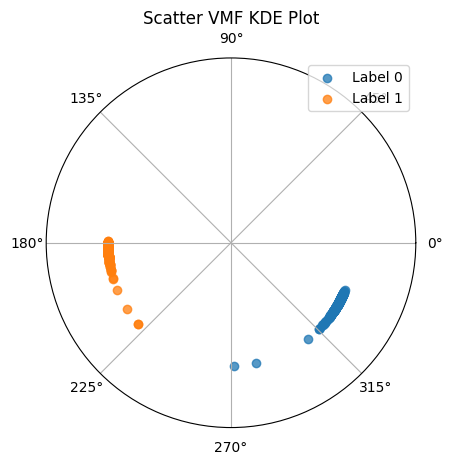

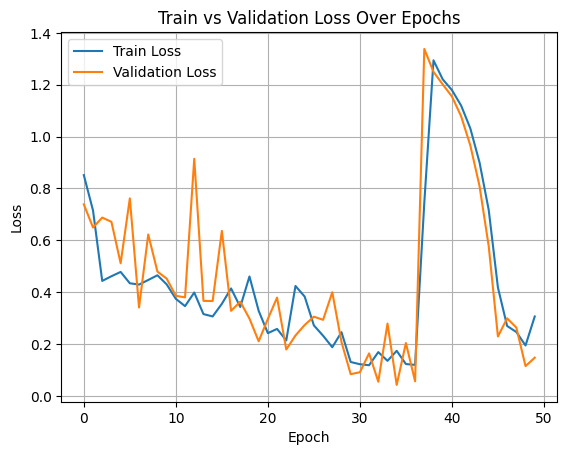

In [4]:
model = Conv_Siamese(activ_type="relu", pool_type="max", channel_nums=8, head_output=2, lr=1e-3)

# Plot embeddings before training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# Training the model
logger = CSVLogger(save_dir="logs/", name="MNIST_Siamese", version=0)
trainer = Trainer(max_epochs=50, logger=logger, devices=1 if torch.cuda.is_available() else 0)
trainer.fit(model, train_loader, val_loader)

# Plot embeddings after training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(logger.log_dir)

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


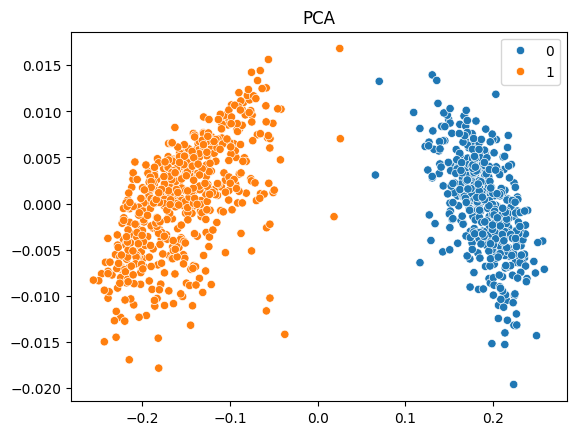

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:74: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="T-SNE")


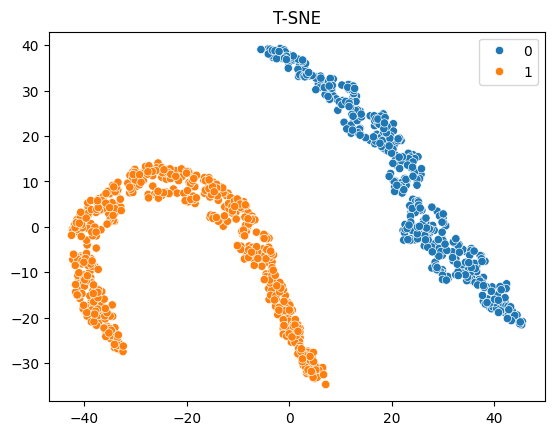

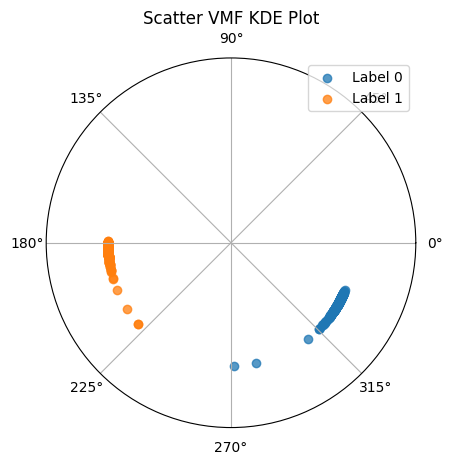

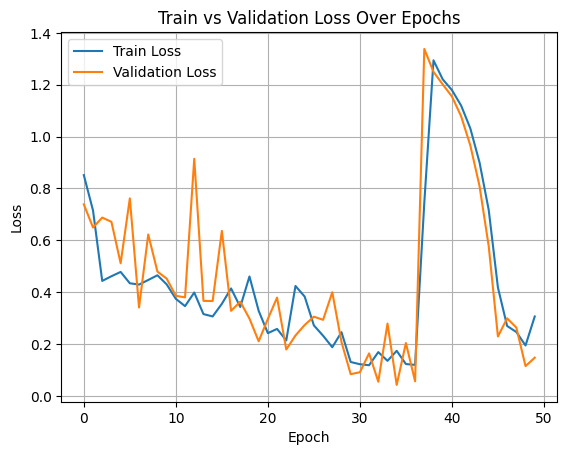

In [5]:
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

plot_training(logger.log_dir)

## Photon-Electron Dataset

In [7]:
from qml_ssl.data.img_pe import *

electron_file = "../data/PhotonElectron/electron.hdf5"
photon_file = "../data/PhotonElectron/photon.hdf5"

inspect_h5py_file(electron_file)
inspect_h5py_file(photon_file)

Inspecting HDF5 file: ../data/PhotonElectron/electron.hdf5
Name: X
    Shape: (249000, 32, 32, 2)
    Dtype: float32
Name: y
    Shape: (249000,)
    Dtype: float32
Inspecting HDF5 file: ../data/PhotonElectron/photon.hdf5
Name: X
    Shape: (249000, 32, 32, 2)
    Dtype: float32
Name: y
    Shape: (249000,)
    Dtype: float32


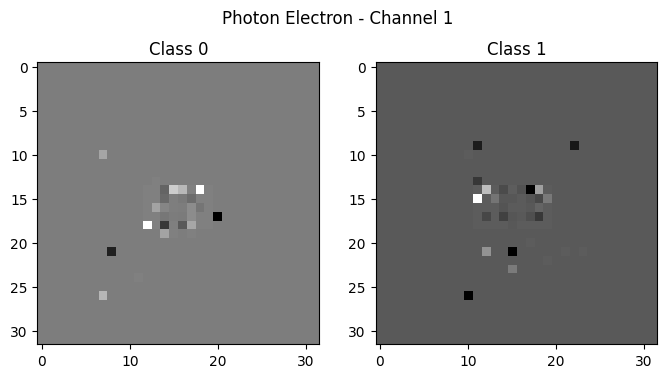

In [8]:
reduced_dim = None
dataset_size = 1000
channel = 1

# Load and preprocess the particle data
particle_data = load_pe_data(electron_file, photon_file, reduced_dim=reduced_dim, dataset_size=dataset_size, channel=channel)

# Visualize the preprocessed images
train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_data(train_data, train_labels, classes=(0, 1), title=f"Photon Electron - Channel {channel}")

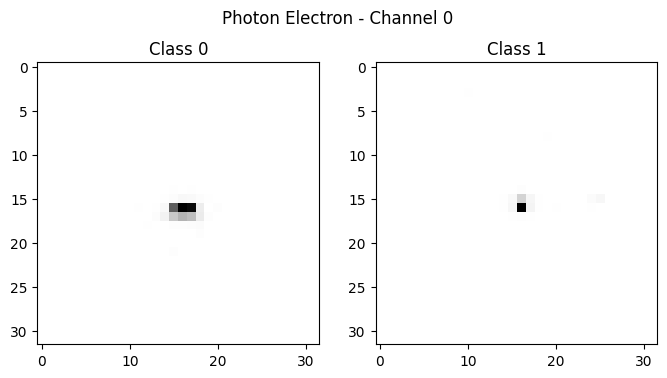

In [9]:
reduced_dim = None
dataset_size = 1000
channel = 0

# Load and preprocess the particle data
particle_data = load_pe_data(electron_file, photon_file, reduced_dim=reduced_dim, dataset_size=dataset_size, channel=channel)

# Visualize the preprocessed images
train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_data(train_data, train_labels, classes=(0, 1), title=f"Photon Electron - Channel {channel}")


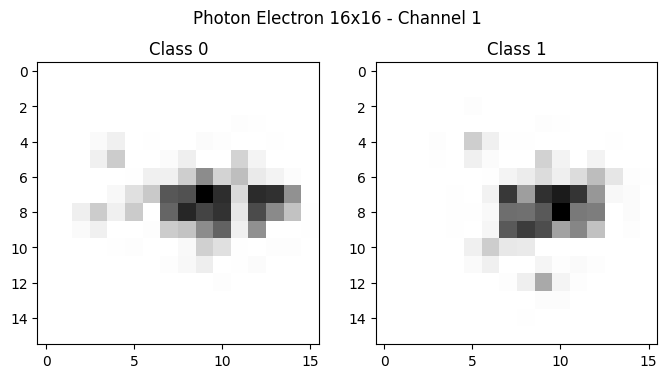

In [10]:
reduced_dim = 16
dataset_size = 1000
channel = 1

# Load and preprocess the particle data
particle_data = load_pe_data(electron_file, photon_file, reduced_dim=reduced_dim, dataset_size=dataset_size, channel=channel)

# Visualize the preprocessed images
train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_data(train_data, train_labels, classes=(0, 1), title=f"Photon Electron 16x16 - Channel {channel}")

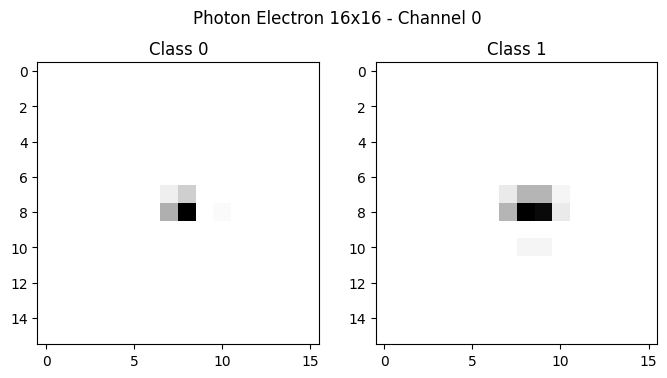

In [11]:
reduced_dim = 16
dataset_size = 100000
channel = 0

# Load and preprocess the particle data
particle_data = load_pe_data(electron_file, photon_file, reduced_dim=reduced_dim, dataset_size=dataset_size, channel=channel)

# Visualize the preprocessed images
train_data = particle_data["train_dataset"].data
train_labels = particle_data["train_dataset"].labels
visualize_data(train_data, train_labels, classes=(0, 1), title=f"Photon Electron 16x16 - Channel {channel}")

/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


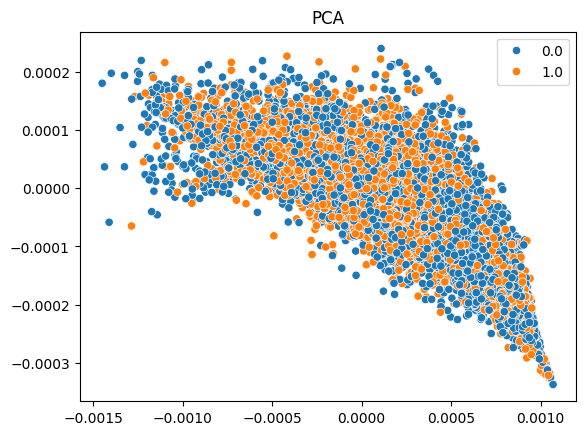

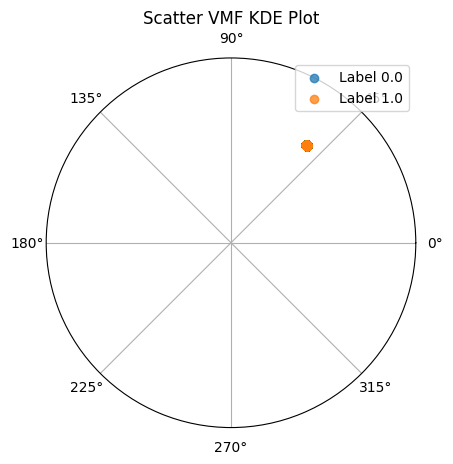

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type            | Params | Mode
------------------------------------------------------
0 | encoder    | ConvEncoder     | 360    | eval
1 | head       | LinearHead      | 18     | eval
2 | loss       | ContrastiveLoss | 0      | eval
3 | train_loss | MeanMetric      | 0      | eval
4 | valid_loss | MeanMetric      | 0      | eval
------------------------------------------------------
378       Trainable params
0         Non-trainable params
378       Total params
0.002     Total estimated model params size (MB)
0         Modules in train mode
23        Modules in eval mode


Epoch 19: 100%|██████████| 2188/2188 [00:45<00:00, 48.30it/s, v_num=0, val_loss=1.380, train_loss=1.380]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 2188/2188 [00:45<00:00, 48.28it/s, v_num=0, val_loss=1.380, train_loss=1.380]


/home/duydl/Projects/gsoc24/gsoc24-qml-workspace/src/qml_ssl/utils.py:61: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=proj[:, 0], y=proj[:, 1], hue=labels, palette=sns.color_palette("tab10")).set(title="PCA")


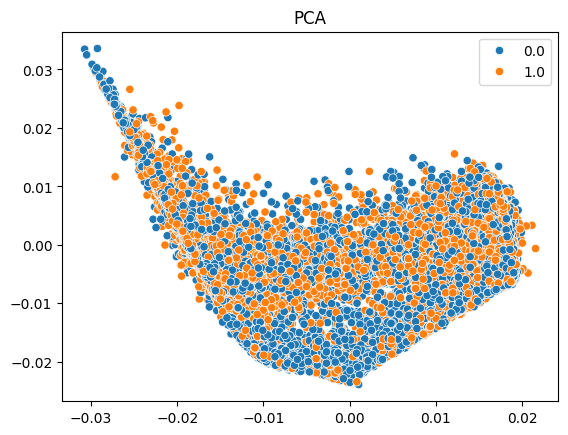

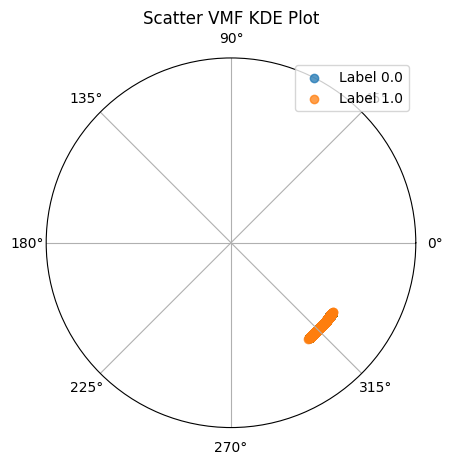

In [12]:
classes = (0, 1)

train_loader = create_data_loader(torch.tensor(particle_data["train_dataset"].data), torch.tensor(particle_data["train_dataset"].labels))
val_loader = create_data_loader(torch.tensor(particle_data["val_dataset"].data), torch.tensor(particle_data["val_dataset"].labels), shuffle=False)

model = Conv_Siamese(activ_type="relu", pool_type="max", channel_nums=8, head_output=2, lr=1e-3)

# Plot embeddings before training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)

# Training the model
logger = CSVLogger(save_dir="logs/", name="Conv_Classifier", version=0)
trainer = Trainer(max_epochs=20, logger=logger, devices=1 if torch.cuda.is_available() else 0)
trainer.fit(model, train_loader, val_loader)

# Plot embeddings after training
embeddings, labels = generate_embeddings(model, val_loader)
pca_proj(embeddings, labels)
# tsne_proj(embeddings, labels)
vmf_kde_on_circle(embeddings, labels)